In [3]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import sklearn as skl 
from sklearn import datasets

from sklearn.model_selection import train_test_split 
from sklearn.datasets import load_iris

from sklearn.linear_model import LogisticRegression

In [4]:
#загружаем датасет iris 
iris = load_iris()
df = pd.DataFrame(iris.data, columns = iris.feature_names)
df['target'] = iris.target
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


Text(0.5, 1.0, 'petal length - petal width')

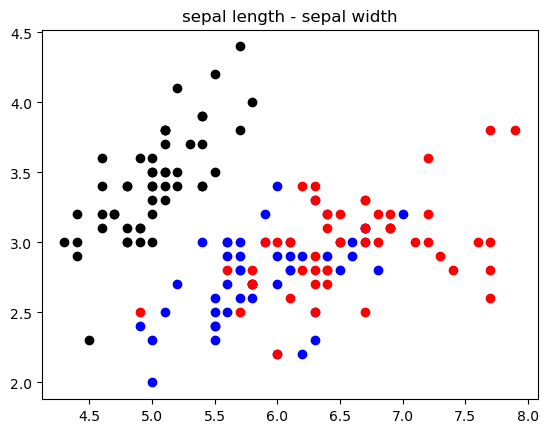

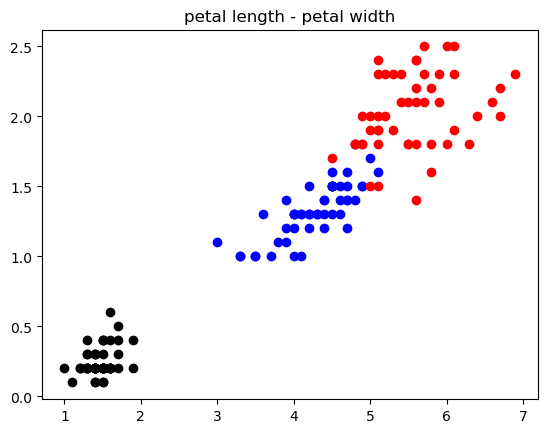

In [5]:
#разделим на три одельных датафрейма - по каждому виду 
setosa_df = df[df['target'] == 0]
ver_df = df[df['target'] == 1]
virg_df = df[df['target'] == 2]

#отрисовываем зависимость sepal length - sepal width
plt.figure()
plt.scatter(setosa_df['sepal length (cm)'],setosa_df['sepal width (cm)'],c = 'BLACK')
plt.scatter(ver_df['sepal length (cm)'],ver_df['sepal width (cm)'],c = 'BLUE')
plt.scatter(virg_df['sepal length (cm)'],virg_df['sepal width (cm)'],c = 'RED')
plt.title("sepal length - sepal width")

#отрисовываем зависмость 
plt.figure()
plt.scatter(setosa_df['petal length (cm)'],setosa_df['petal width (cm)'],c = 'BLACK')
plt.scatter(ver_df['petal length (cm)'],ver_df['petal width (cm)'],c = 'BLUE')
plt.scatter(virg_df['petal length (cm)'],virg_df['petal width (cm)'],c = 'RED')
plt.title("petal length - petal width")


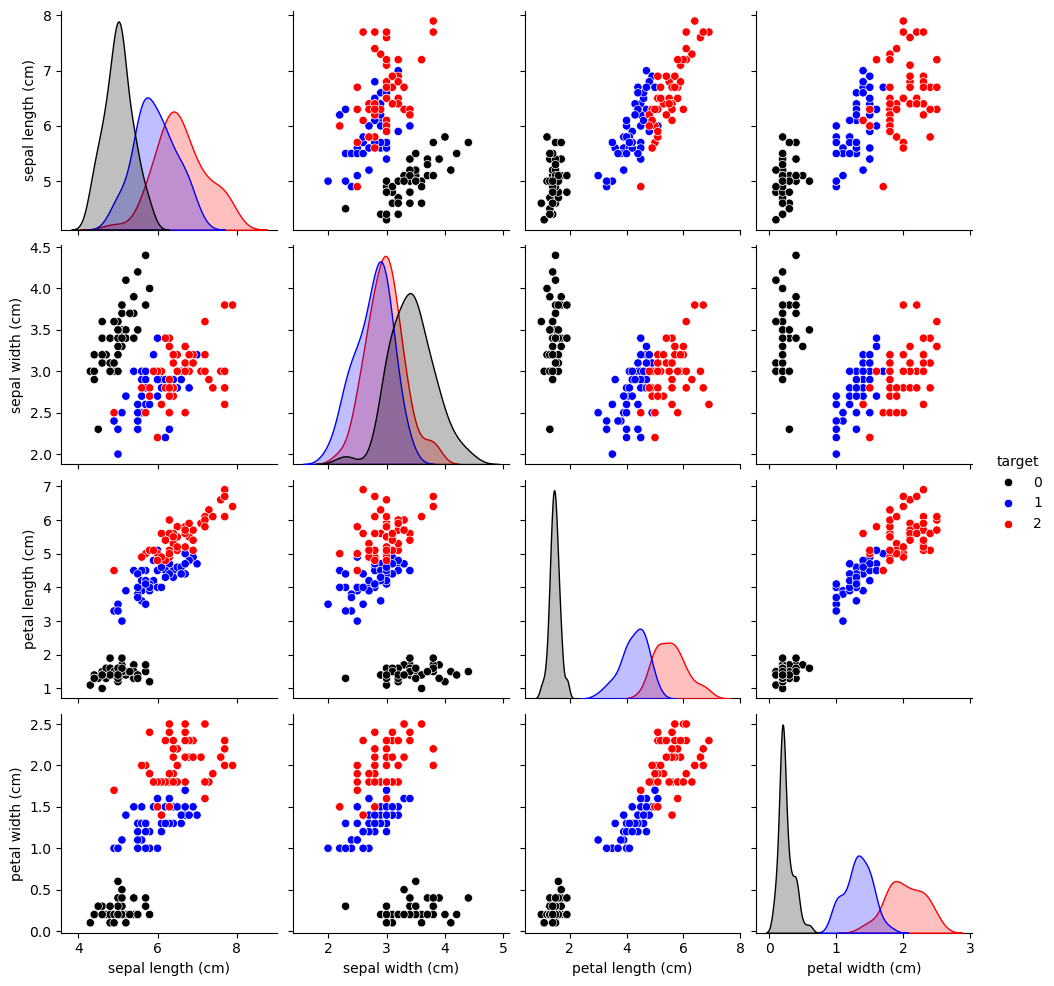

In [6]:
#вывод с помощью seaborn 
sns.pairplot(df, hue = 'target',palette={0:'BLACK',1:'BLUE',2:'RED'})

In [7]:
#разделяем датасет на два:  setosa + versicolor, versicolor + virginica 
set_ver_df = df[df['target'] != 2]
ver_vir_df = df[df['target'] != 0]

sv_X = set_ver_df.iloc[:,:-1]
sv_y = set_ver_df.iloc[:,-1]


vv_X = ver_vir_df.iloc[:,:-1]
vv_y = ver_vir_df.iloc[:,-1]


#разбиваем на train и test оба датасета:
sv_X_train, sv_X_test, sv_y_train, sv_y_test = train_test_split(sv_X, sv_y, test_size=0.2, random_state=0)
vv_X_train, vv_X_test, vv_y_train, vv_y_test = train_test_split(vv_X, vv_y, test_size=0.2, random_state=0)


In [52]:
# обучаем на SV датасете
sv_clf = LogisticRegression(random_state=0)
sv_clf.fit(sv_X,sv_y)
sv_y_pred = sv_clf.predict(sv_X_test)
print("Точность модели: ", sv_clf.score(sv_X_test,sv_y_test))


Точность модели:  1.0


In [9]:
#vv датасет 
vv_clf = LogisticRegression(random_state=0)
vv_clf.fit(vv_X,vv_y)
vv_y_pred = vv_clf.predict(vv_X_test)
print("Точность модели: ", vv_clf.score(vv_X_test,vv_y_test))


Точность модели:  0.95


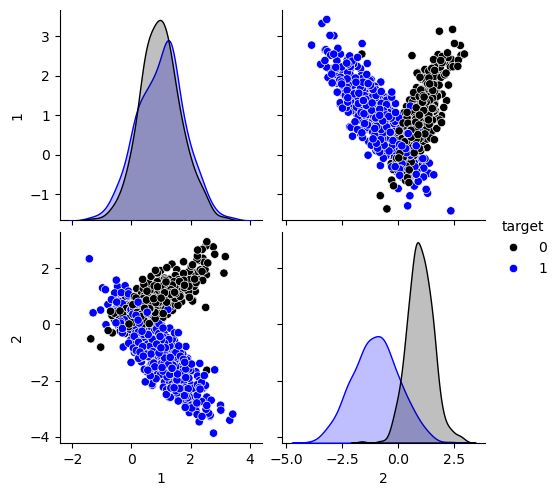

In [60]:
mc_X, mc_y = skl.datasets.make_classification(n_samples=1000, n_features=2, n_redundant=0, 
n_informative=2,random_state=1, n_clusters_per_class=1)
df2 = pd.DataFrame(np.array(mc_X),columns = ['1','2'])
df2['target'] = mc_y
sns.pairplot(df2, hue = 'target',palette={0:'BLACK',1:'BLUE'})

In [64]:
mc_X_train, mc_X_test, mc_y_train, mc_y_test = train_test_split(mc_X, mc_y, test_size=0.2, random_state=0)

mc_clf = LogisticRegression(random_state=0)
mc_clf.fit(mc_X_train,mc_y_train)
mc_y_pred = mc_clf.predict(mc_X_test)
print("Точность модели: ", mc_clf.score(mc_X_test,mc_y_test))

Точность модели:  0.925
